# In this notebook, we look at:

1. **Lexical Dispersion Plot** - where in the corpus a word appears
2. Plotting **Frequency Over Time**


# 1. Lexical Dispersion Plot - where in the corpus a word appears


#### Questions & Objectives:

- How can I measure how frequently a word appears across the parts of a corpus?
- How can I plot the occurrences of a word and how many words from the beginning of the corpus it appears?
- We will use the US Presidential Inaugural Addresses and which are provided with NLTK.

#### Key Points

- Lexical dispersion is a visualisation that allows us to see where a particular term appears across a document or set of documents
- We used NLTK’s dispersion_plot .

In [3]:
# run this cell now. It's the usual imports of text mining libraries

import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

We can plot lexical dispersion of particular tokens.

**Lexical dispersion is a measure of how frequently a word appears across the parts of a corpus**. 

This plot notes the occurrences of a word and how many words from the beginning of the corpus it appears (word offsets). This is particularly useful for a corpus that covers a longer time period and for which you want to analyse how specific terms were used more or less frequently over time.

To create a lexical disperson plot, we will first load and import a different corpus, the ``inaugural`` corpus which are all US Presidential Inaugural Addresses and which are provided with NLTK: US Presidential Inaugural Addresses (1789-present)

Many libraries (for text mining, visualisation, etc) come with these build-in data sets.

In [4]:
#nltk.download('inaugural') #first time running, download package
from nltk.corpus import inaugural
from nltk.text import Text

inaugural_tokens = inaugural.words()
inaugural_texts = Text(inaugural_tokens)

In [6]:
inaugural_texts

<Text: Fellow - Citizens of the Senate and of...>

To create the lexical dispersion plot for this corpus we also need to load `dispersion_plot` from the `nltk.draw.dispersion` package.

We can then call the dispersion_plot method given a set of parameters, including the target words we want to plot across the corpus, whether this should be done case-sensitively, and specifying the title of the plot.

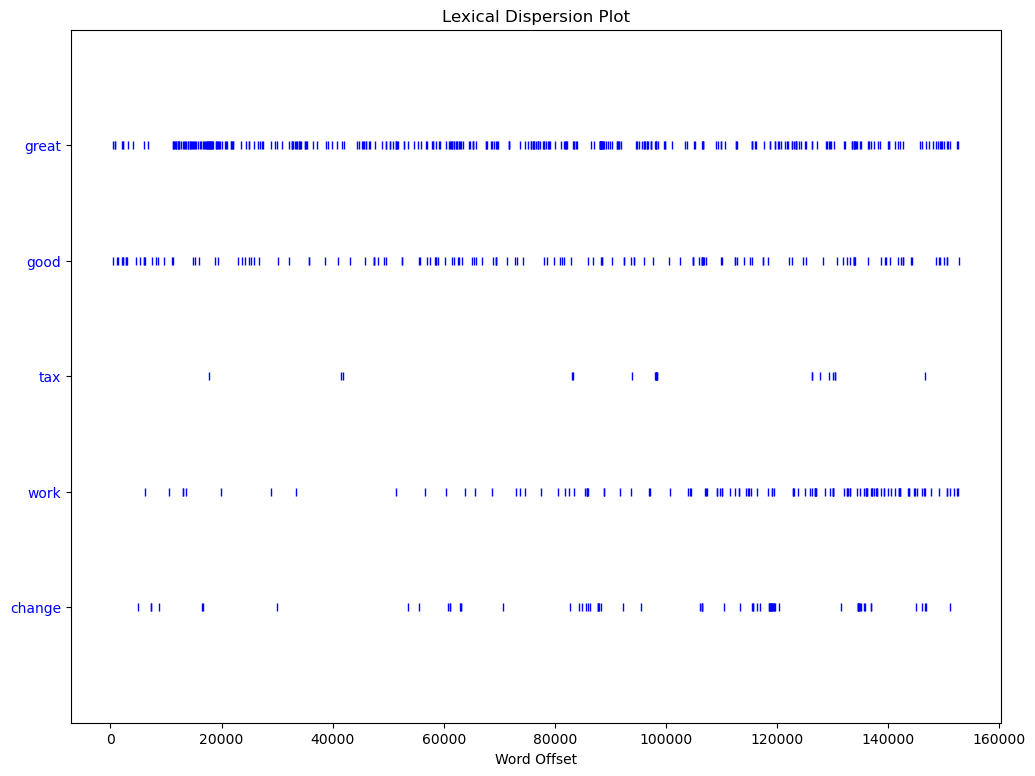

In [7]:
from nltk.draw.dispersion import dispersion_plot

# the following command can be used to increase the size of the plot using width and hight specifications
plt.figure(figsize=(12, 9))
targets=['great','good','tax','work','change']

dispersion_plot(inaugural_texts, targets, ignore_case=True, title='Lexical Dispersion Plot')

### 🖇🐛 Another Example:
Let us try words that might have been used only in some time periods? Try words like 'war', 'peace', 'freedom', 'women', 'slavery', 'god'


It is really annoying that we cannot see exactly the year when the particular word was heavilly used. We will solve that problem in the next section. 



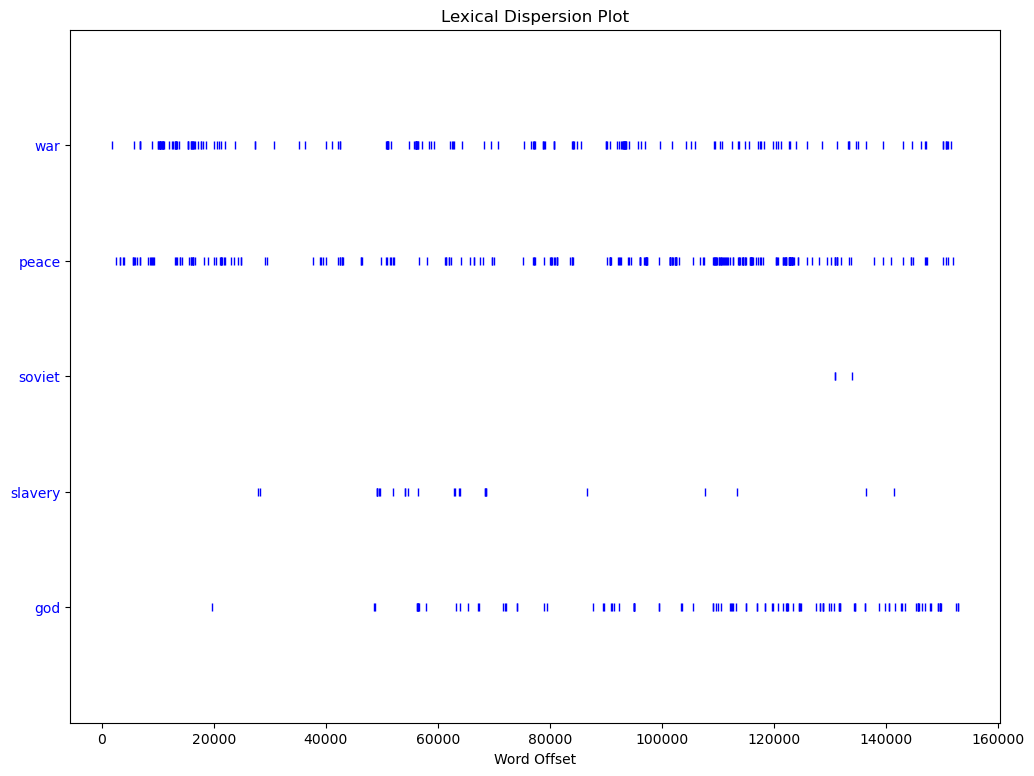

In [11]:
from nltk.draw.dispersion import dispersion_plot

plt.figure(figsize=(12, 9))
targets=['war','peace','soviet', 'slavery', 'god']

dispersion_plot(inaugural_texts, targets, ignore_case=True, title='Lexical Dispersion Plot')

# 2. Plotting Frequency Over Time


#### Questions & Objectives:

- How can I extract and plot the frequency of specific terms over time?
- How to use a NLTK’s ConditionalFreqDist class to extract the frequency of defined words.

#### Key Points

- We extract terms and the years from the files using NLTK’s ``ConditionalFreqDist`` class from the ``nltk.probability`` package
- How to plot these on a graph to visualise how the use changes over time



In [13]:
fruits = ['pear', "banana", "kiwi", 'apple' ]
targets = ['a', 'p', 'w']

new_words = [(fruit, target)
            for fruit in fruits
            for letter in fruit
            for target in targets
            if letter == target
            ]
print(new_words)

[('pear', 'p'), ('pear', 'a'), ('banana', 'a'), ('banana', 'a'), ('banana', 'a'), ('kiwi', 'w'), ('apple', 'a'), ('apple', 'p'), ('apple', 'p')]


## How to take meta-information from files to understand corpus better

Similarly to lexical dispersion, we can also plot frequency of terms over time. This is similar to the Google n-gram visualisation for the Google Books corpus but we will show you how to do something similar with own corpus.

We first need to import NLTK’s ConditionalFreqDist class from the nltk.probability package. To generate the graph, we have to specify the list of words to be plotted (see targets) and the x-axis labels (in this case the year the inaugural was held which appears at the start of each file: fileid[:4]).

Note: file names are in format `1789-Washington.txt`, `1801-Jefferson.txt` so first 4 characters describe the year the speech was given

The required data for the plot needs to be in format, where word is repeated for each year as many times as it was used that year, eg `freedom` was used 4 times in 1801 and twice in 1805:

```
[('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1801'),
 ('freedom', '1805'),
 ('freedom', '1805'),
 ('freedom', '1809'),
...
```

This dataset is created by:

- return a tupple with a word and the year of the speech `(target, fileid[:4])`
- for each **filename** (fileid) from the speeches set: `for fileid in inaugural.fileids()`
- then for each **word** in that file `for word in inaugural.words(fileid)`
- then for each **target** word in our specified target words
- use that word **only if** word starts with the target `if word.lower().startswith(target))`
    
```
[(target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if word.lower().startswith(target)]
```
    

The ``ConditionalFreqDist`` object (cfd) stores the number of times each of the target words appear in the each of the speaches and the plot() method is used to visualise the graph.

Also see the following websites for more examples:

- https://www.nltk.org/api/nltk.html?highlight=conditionalfreqdist#nltk.probability.ConditionalFreqDist
- https://lost-contact.mit.edu/afs/cs.pitt.edu/projects/nltk/docs/tutorial/probability/conditionalfreqdist.html

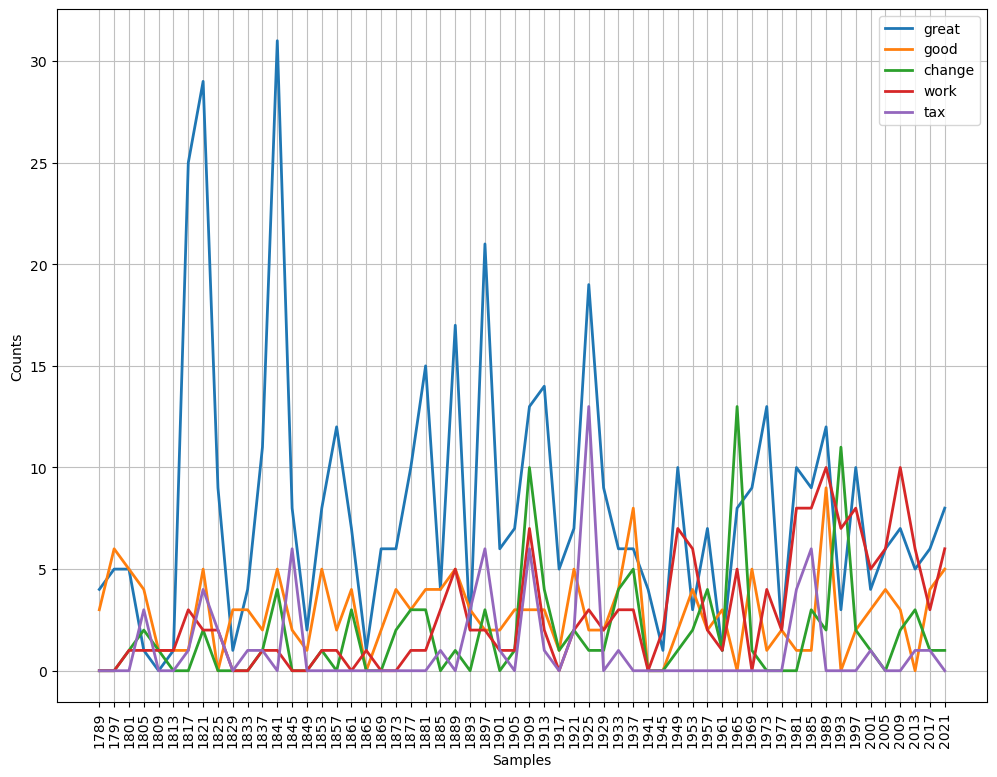

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
from nltk.probability import ConditionalFreqDist

# type this to set the figure size
plt.rcParams["figure.figsize"] = (12, 9)

targets=['great','good','tax','work','change']

cfd = nltk.ConditionalFreqDist(
    [(target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if word.lower().startswith(target)])

cfd.plot()

### 🐛Let us do it again but with Regular Expression: 


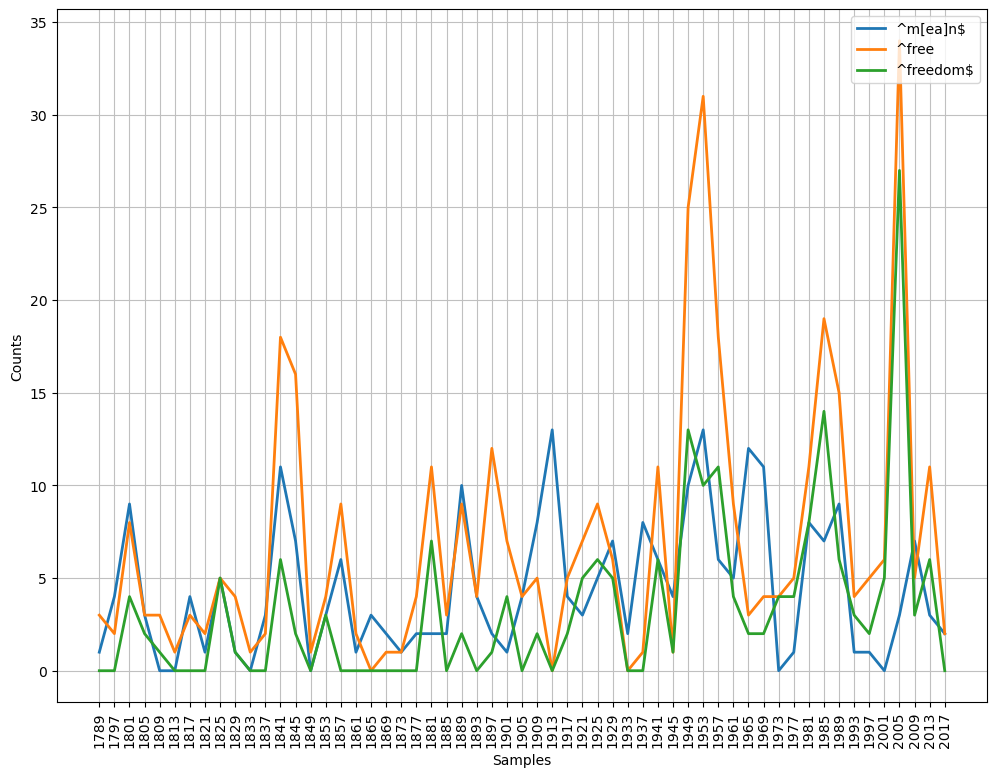

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# copypaste the graph code to this cell and write your answer here
import re
from nltk.probability import ConditionalFreqDist

# type this to set the figure size
plt.rcParams["figure.figsize"] = (12, 9)

targets=['^m[ea]n$', '^freedom$', '^free']

cfd = nltk.ConditionalFreqDist(
    [(target, fileid[:4])
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    for target in targets
    if re.search(target, word.lower())])

cfd.plot()

# 3. Collocations


#### Questions & Objectives:

- How can I see what terms are often used together in a text or corpus?
- We want to see words that collocate, occur together more often than by chance.
- We will see what words co-occur within five words of each other.
- We will then see which words appear more than ten times together.
- We will then look at a measure to score the likelihood of these collocations being unusual.

#### Key Points

- We will use NLTK’s `BigramAssocMeasures()` and `BigramCollocationFinder` to find the words commonly found together in the US Presidential Inaugural Addresses set.
- We will score these collocations using bigram_measures.likelihood_ratio

We may want to see what terms are often used together. We can do this by looking for collocations in a text, i.e. two word tokens occurring together in the text more often than would be expected by chance.

For this we need to import the nltk.collocations module and more specifically BigramAssocMeasures() and BigramCollocationFinder. We allow a window of 5 words between collocated words.

In [19]:
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(inaugural_tokens, 5)

In [20]:
#We then look for words that appear together 10 times or more.
finder.apply_freq_filter(10)

A number of measures are available to score collocations or other associations including `bigram_measures.likelihood_ratio`. We apply this measure below and show the top ten collocated tokens (occuring in a window of 5 tokens with a frequency of 10 or more).

In [21]:
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('the', 'of'),
 ("'", 's'),
 ('.', 'The'),
 ('.', 'We'),
 ('United', 'States'),
 ('has', 'been'),
 ('.', '.'),
 ('have', 'been'),
 (',', 'and'),
 ('.', 'It')]

### 🐛 Let us Re-do the collocation analysis after removing stopwords, punctuation, etc


In [26]:
inaugural_tokens = inaugural.words()


from nltk.corpus import stopwords

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

inaugural_tokens = [word.lower() for word in inaugural_tokens]

inaugural_tokens = [word
                 for word in inaugural_tokens 
                 if not word in remove_these]


bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(inaugural_tokens, 5)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('united', 'states'),
 ('fellow', 'citizens'),
 ('let', 'us'),
 ('one', 'another'),
 ('men', 'women'),
 ('four', 'years'),
 ('god', 'bless'),
 ('vice', 'president'),
 ('years', 'ago'),
 ('federal', 'government')]